In [1]:
import sys
configDir =  '/home/thibaud/repos/anaconda/rakuten/notebook'
if configDir not in sys.path:
    sys.path.append(configDir)

import config

print(sys.path)

['/home/thibaud/repos/anaconda/rakuten/notebook', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python39.zip', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/lib-dynload', '', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages', '/home/thibaud/repos/anaconda/rakuten', '/home/thibaud/repos/anaconda/rakuten/src']


/home/thibaud/repos/anaconda/rakuten/data/clean
                                       precision    recall  f1-score   support

                 10 - Livres occasion       0.90      0.91      0.91       623
1140 - Figurines et objet pop culture       0.91      0.93      0.92       534
                1160 - Cartes de jeux       0.97      0.99      0.98       791
     1180 - Figurines et jeux de rôle       0.81      0.73      0.77       153
                1280 - Jouets enfants       0.89      0.88      0.89       974
       1281 - Jeux de société enfants       0.88      0.83      0.85       414
               1300 - Jeux techniques       0.98      1.00      0.99      1009
              1301 - Vêtements enfant       0.99      0.98      0.98       161
                         1302 - Pêche       0.91      0.88      0.90       498
                  1320 - Puériculture       0.96      0.91      0.93       648
                      1560 - Mobilier       0.94      0.93      0.93      1015
   

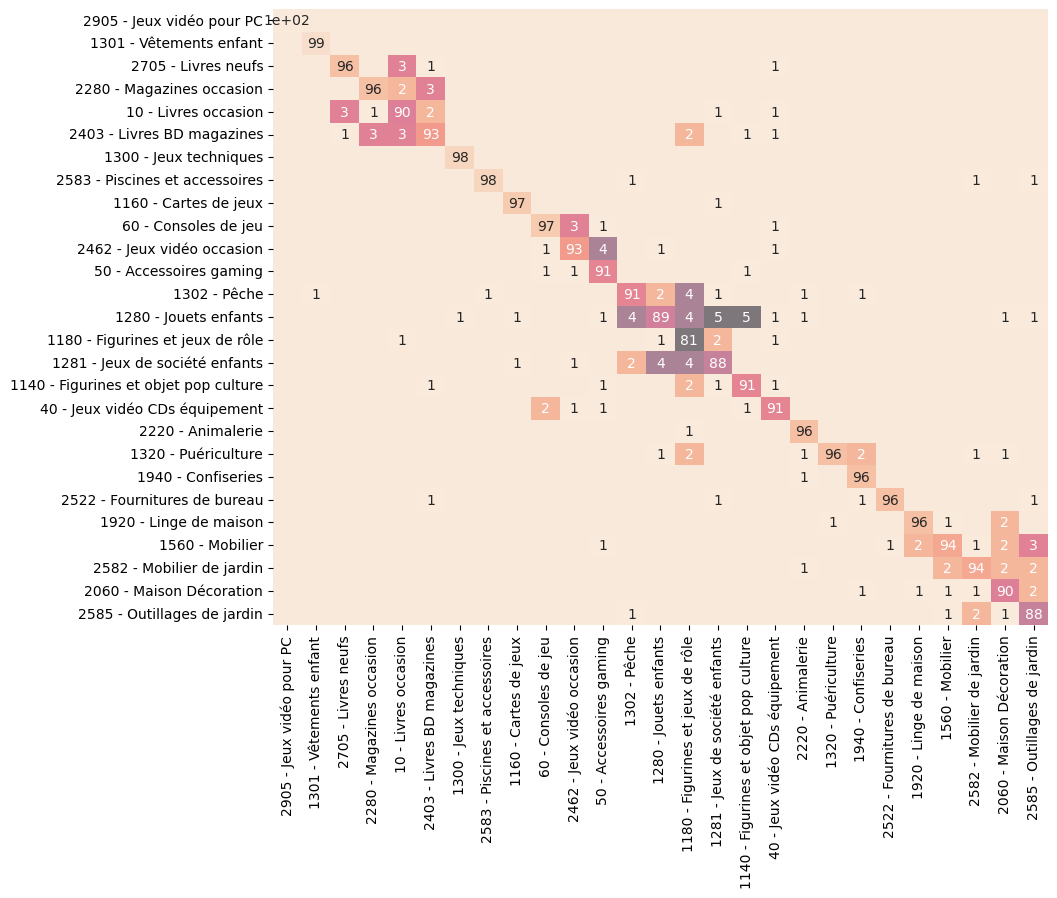

In [32]:

import warnings
warnings.filterwarnings('ignore')
from importlib import reload
import src.utils.results as results

print(config.path_to_data)
reload(results)
from src.utils.results import ResultsManager
res = ResultsManager(config)
res.add_result_file('../results/results_benchmark_sklearn.csv', 'text')
res.add_result_file('../results/results_benchmark_bert.csv', 'bert')
res.add_result_file('../results/results_benchmark_img.csv', 'img')

# res.plot_f1_scores(filter_package=['bert','text'])
# res.plot_f1_scores_by_prdtype(filter_package=['bert','text'])

# res.plot_classification_report('text/LinearSVC_tfidf')
# res.df_results[res.df_results.package=='img'].head()
# text/camembert-base-ccnet
# image/vit_b16
# text/LinearSVC_tfidf

# print(res.get_model_paths())
res.plot_classification_report_merged(['text/LinearSVC_tfidf', 'text/camembert-base-ccnet', 'image/vit_b16','text/flaubert_base_uncased', 'image/ResNet152'])

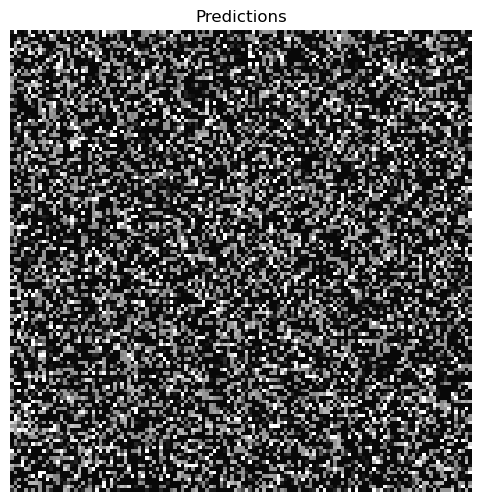

<module 'matplotlib.pyplot' from '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [25]:
model1 = "text/camembert-base-ccnet"
model2 = "image/vit_b16"
model3 = "text/SVC_skipgram"


def plot_square_pred(res, models =[]):

    y_pred = []
    y_test = res.get_y_test("text/camembert-base-ccnet")
    y_test = y_test[:16900]


    for model in models:
        pred = np.array(res.get_y_pred(model))
        pred = pred[:16900]
        pred = pred != y_test
        pred = pred.reshape(130,130)

        y_pred.append(pred)

    
    # import matplotlib.pyplot as plt
    # plt.figure(figsize=(6,6))
    # for pred in y_pred:
    #     plt.imshow(pred, cmap='gray', interpolation='nearest', alpha=0.5)
    # plt.title('Predictions')
    # plt.axis('off')  # Turn off axis
    # plt.show()

    return
plot_square_pred(res, [model1, model2, model3, 'text/flaubert_base_uncased', 'image/ResNet152'])

# y_pred1 = res.get_y_pred(model1)
# y_pred2 = res.get_y_pred(model2)
# y_pred3 = res.get_y_pred(model3)
# y_test = res.get_y_test(model1)

# import numpy as np
# y_pred1 = np.array(y_pred1[:16900])
# y_pred2 = np.array(y_pred2[:16900])
# y_test = np.array(y_test[:16900])

# print(type(y_pred1))
# y_compare1 = y_pred1 != y_test
# y_compare2 = y_pred2 != y_test

# # print(y_compare)
# img_1 = y_compare1.reshape(130,130)
# img_2 = y_compare2.reshape(130,130)
# img_3 = 
# composite = np.logical_and(img_1, img_2)



# import matplotlib.pyplot as plt
# plt.figure(figsize=(6,6))
# plt.imshow(img_1, cmap='gray', interpolation='nearest', alpha=0.5)
# plt.imshow(img_2, cmap='gray', interpolation='nearest', alpha=0.5)
# plt.imshow(composite, cmap='gray', interpolation='nearest', alpha=0.5)

# plt.title('Boolean Image')
# plt.axis('off')  # Turn off axis
# plt.show()

In [13]:
from importlib import reload
import plotly.graph_objs as go
import numpy as np
import src.utils.plot as uplot

reload(uplot)
scores = fusion[['model_path', 'score_test', 'package', 'classifier', 'vectorization']]

# display(scores)


scores.loc[:, 'vectorizer'] = scores.apply(lambda row: row.classifier if pd.isna(row.vectorization) else row.vectorization, axis=1)
scores=scores.groupby(['model_path', 'package', 'classifier', 'vectorizer']).max('score_test').reset_index()
scores = scores[scores.package != 'img']
sorted_scores = scores.sort_values(by='score_test', ascending=False)

# Sort 'scores' by 'score_test' in descending order
sorted_scores = scores.sort_values('score_test', ascending=False)

# Create custom categories order based on the sorted 'score_test'
custom_categories_order = sorted_scores['model_path'].tolist()


uplot.plot_bench_results(
    sorted_scores, 
    'model_path', 
    'score_test', 
    'model', 
    'f1 score', 
    color_column='vectorizer',
    title='Benchmark des f1 scores'
)




/tmp/ipykernel_1141312/2952430557.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<module 'matplotlib.pyplot' from '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [ ]:
from importlib import reload
import plotly.graph_objs as go
import numpy as np
import src.utils.plot as uplot

reload(uplot)
scores = fusion[['model_path', 'score_test', 'package', 'classifier', 'vectorization']]

# display(scores)


scores.loc[:, 'vectorizer'] = scores.apply(lambda row: row.classifier if pd.isna(row.vectorization) else row.vectorization, axis=1)
scores=scores.groupby(['model_path', 'package', 'classifier', 'vectorizer']).max('score_test').reset_index()
scores = scores[scores.package != 'img']
sorted_scores = scores.sort_values(by='score_test', ascending=False)

# Sort 'scores' by 'score_test' in descending order
sorted_scores = scores.sort_values('score_test', ascending=False)

# Create custom categories order based on the sorted 'score_test'
custom_categories_order = sorted_scores['model_path'].tolist()


uplot.plot_bench_results(
    sorted_scores, 
    'model_path', 
    'score_test', 
    'model', 
    'f1 score', 
    color_column='vectorizer',
    title='Benchmark des f1 scores'
)


